In [1]:
from wordcloud import WordCloud
from konlpy.tag import Komoran
from collections import Counter
import numpy as np
from PIL import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f = open("./interview.txt",'rt',encoding='utf-8')
lines = f.readlines()
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

In [3]:
print(line)

['1.\n', '- 신촌로에서 킥보드 타기는 너무 위험하다 느껴져서, 주로 골목길을 이용한다. \n', '- 자전거우선도로: 차도의 바깥차선이 자전거우선도로인지도 몰랐다. 알았음에도, 이미 차가 쌩쌩 달리고 오토바이도 엄청 다녀서 탈 수 없다. 탈 의향 없음.\n', '- 위당관 내리막길에서 킥보드를 탔는데, 후면에도 브레이크가 있는 줄 모르고 전면 손잡이 브레이크만 사용했다. 제어가 안되어 당황하고 위험했으나, 다행히 주변에 사람이 없어서 내가 넘어지듯이 몸으로 제어해서 피해는 없었다. 사람이 있었으면 충분히 사고가 날 수 있었을 것이다.\n', '- 규제가 명확하지 않은 상황이라 차와 같이 달려야 하는 경우도 있고, 인도로 다닐 수도 없다. 갑자기 옆에서 차가 빠른 속도로 오거나 차도에 사람이 지나가면 위험했다.\n', '- 백양로에서 pm을 이용하거나, 연세로의 인도에서 무분별하게 전동킥보드를 이용하는 사람들이 많아서, 도보 통행에 위험함을 느꼈다. 특히, 전동킥보드 이용자들은 사람들 사이사이를 지나다니며 곡예주행을 하는 경우 많아 위험하게 느껴졌다. \n', '- 골목길도 오토바이+일반 승용차 일부로도 충분히 통행에 신경써야하는데, 전동킥보드 타는 사람들이 추가되면서 걸을 때 앞 뒤 옆 다 신경쓰면서 걷게 된다.\n', '- 아무데나 주차해도 된다는 생각이 기저에 있어서 탈 때뿐만 아니라, 무분별한 전동킥보드, 자전거 주차로 인해 통행에 방해될 때가 많다. \n', '- 쓰러진 전동킥보드에 대한 조치가 없으면 인도의 대부분을 침범하고 못보면 넘어질수 있다.\n', '2.\n', '- 연세로\n', '차도로 갈 때 -> 전기자전거, 전동킥보드 이용자가 버스나 차량과의 혼재로 위험해보임\n', '인도로 갈 때 -> 도보 이용자들이 전기자전거, 전동킥보드와의 혼재로 위험해보임\n', '- 골목: 갑자기 옆에서 전동킥보드가 튀어나와서 부딪힐 뻔한 적 있음\n', '- 서문 쪽 급경사구간: 경사구간임에도 종종 타고 다니는 사람들 위험해 보였음\n', '- 인도

In [4]:
import re
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
print(line)

['', ' 신촌로에서 킥보드 타기는 너무 위험하다 느껴져서 주로 골목길을 이용한다 ', ' 자전거우선도로 차도의 바깥차선이 자전거우선도로인지도 몰랐다 알았음에도 이미 차가 쌩쌩 달리고 오토바이도 엄청 다녀서 탈 수 없다 탈 의향 없음', ' 위당관 내리막길에서 킥보드를 탔는데 후면에도 브레이크가 있는 줄 모르고 전면 손잡이 브레이크만 사용했다 제어가 안되어 당황하고 위험했으나 다행히 주변에 사람이 없어서 내가 넘어지듯이 몸으로 제어해서 피해는 없었다 사람이 있었으면 충분히 사고가 날 수 있었을 것이다', ' 규제가 명확하지 않은 상황이라 차와 같이 달려야 하는 경우도 있고 인도로 다닐 수도 없다 갑자기 옆에서 차가 빠른 속도로 오거나 차도에 사람이 지나가면 위험했다', ' 백양로에서 을 이용하거나 연세로의 인도에서 무분별하게 전동킥보드를 이용하는 사람들이 많아서 도보 통행에 위험함을 느꼈다 특히 전동킥보드 이용자들은 사람들 사이사이를 지나다니며 곡예주행을 하는 경우 많아 위험하게 느껴졌다 ', ' 골목길도 오토바이일반 승용차 일부로도 충분히 통행에 신경써야하는데 전동킥보드 타는 사람들이 추가되면서 걸을 때 앞 뒤 옆 다 신경쓰면서 걷게 된다', ' 아무데나 주차해도 된다는 생각이 기저에 있어서 탈 때뿐만 아니라 무분별한 전동킥보드 자전거 주차로 인해 통행에 방해될 때가 많다 ', ' 쓰러진 전동킥보드에 대한 조치가 없으면 인도의 대부분을 침범하고 못보면 넘어질수 있다', '', ' 연세로', '차도로 갈 때  전기자전거 전동킥보드 이용자가 버스나 차량과의 혼재로 위험해보임', '인도로 갈 때  도보 이용자들이 전기자전거 전동킥보드와의 혼재로 위험해보임', ' 골목 갑자기 옆에서 전동킥보드가 튀어나와서 부딪힐 뻔한 적 있음', ' 서문 쪽 급경사구간 경사구간임에도 종종 타고 다니는 사람들 위험해 보였음', ' 인도에서는 절대 킥보드를 이용하게 해서는 안 된다', ' 자전거 우선도로 존재여부 자체를 몰랐음', ' 실제로 자전거나  이용하면 위험할거같음', ' 본

In [14]:
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
result= [r for i in result for r in i]

file_path = "./stopword.txt"

with open(file_path,'rt',encoding='utf-8') as f:
    lines = f.readlines()
lines = [line.rstrip('\n') for line in lines]
stopwords= lines
result = [i for i in result if i not in stopwords]
print(result)

['신촌로', '주로', '골목길', '바깥', '차선', '인지도', '오토바이', '의향', '내리막', '후면', '브레이크', '줄', '전면', '손잡이', '브레이크', '사용', '제어', '당황', '내', '몸', '제어', '피해', '사고', '규제', '상황', '인도', '수도', '속도', '오거', '백양로', '거나', '인도', '무분별', '통행', '사이사이', '곡예', '주행', '골목길', '오토바이', '일반', '승용차', '부로', '통행', '신경', '추가', '걸', '뒤', '신경', '데', '주차', '기저', '무분별', '주차', '통행', '방해', '대한', '조치', '인도', '침범', '연세', '버스', '혼재', '인도', '혼재', '골목', '서문', '급경사', '구간', '사구간', '종종', '인도', '절대', '존재', '본인', '한다해', '절대', '신촌역', '불구', '무분별', '주차', '통행', '방해', '신촌역', '출구', '무분별', '주차', '이어폰', '끼', '소리', '사고', '속도', '곡예', '주행', '횡단보도', '그대로', '고가', '정문', '횡단보도', '사고', '위험성', '처음', '다가', '횡단보도', '횡단보도', '인근', '인도', '침범', '그대로', '횡단보도', '대기', '보도', '혼재', '발생', '안전성', '논', '외로', '무조건', '분리', '경적', '울림', '불구', '이어폰', '충돌', '위험성', '기본', '속도', '줄', '구분', '인식', '아무', '거리', '낌', '보도', '설치', '제대로', '활용', '수가', '직진', '중', '골목', '사고', '뻔', '한적', '급', '정거', '상당', '거리', '이후', '피', '사고', '경험', '바깥', '차선', '클락', '션', '통행', '이름', '클락', '션', '리기', '실효', '인도

In [15]:
counts = Counter(result)
tags = counts.most_common(30)
tag=dict(tags)
tag

{'인도': 15,
 '횡단보도': 10,
 '사고': 9,
 '충돌': 8,
 '속도': 7,
 '통행': 7,
 '주행': 7,
 '혼재': 7,
 '갈래': 6,
 '백양로': 5,
 '정문': 5,
 '브레이크': 4,
 '무분별': 4,
 '주차': 4,
 '그대로': 4,
 '통행금지': 4,
 '차선': 3,
 '곡예': 3,
 '신촌역': 3,
 '이어폰': 3,
 '고가': 3,
 '위험성': 3,
 '보도': 3,
 '경사': 3,
 '신중도': 3,
 '근처': 3,
 '사이': 3,
 '과학관': 3,
 '게': 3,
 '골목길': 2}

(-0.5, 400.5, 389.5, -0.5)

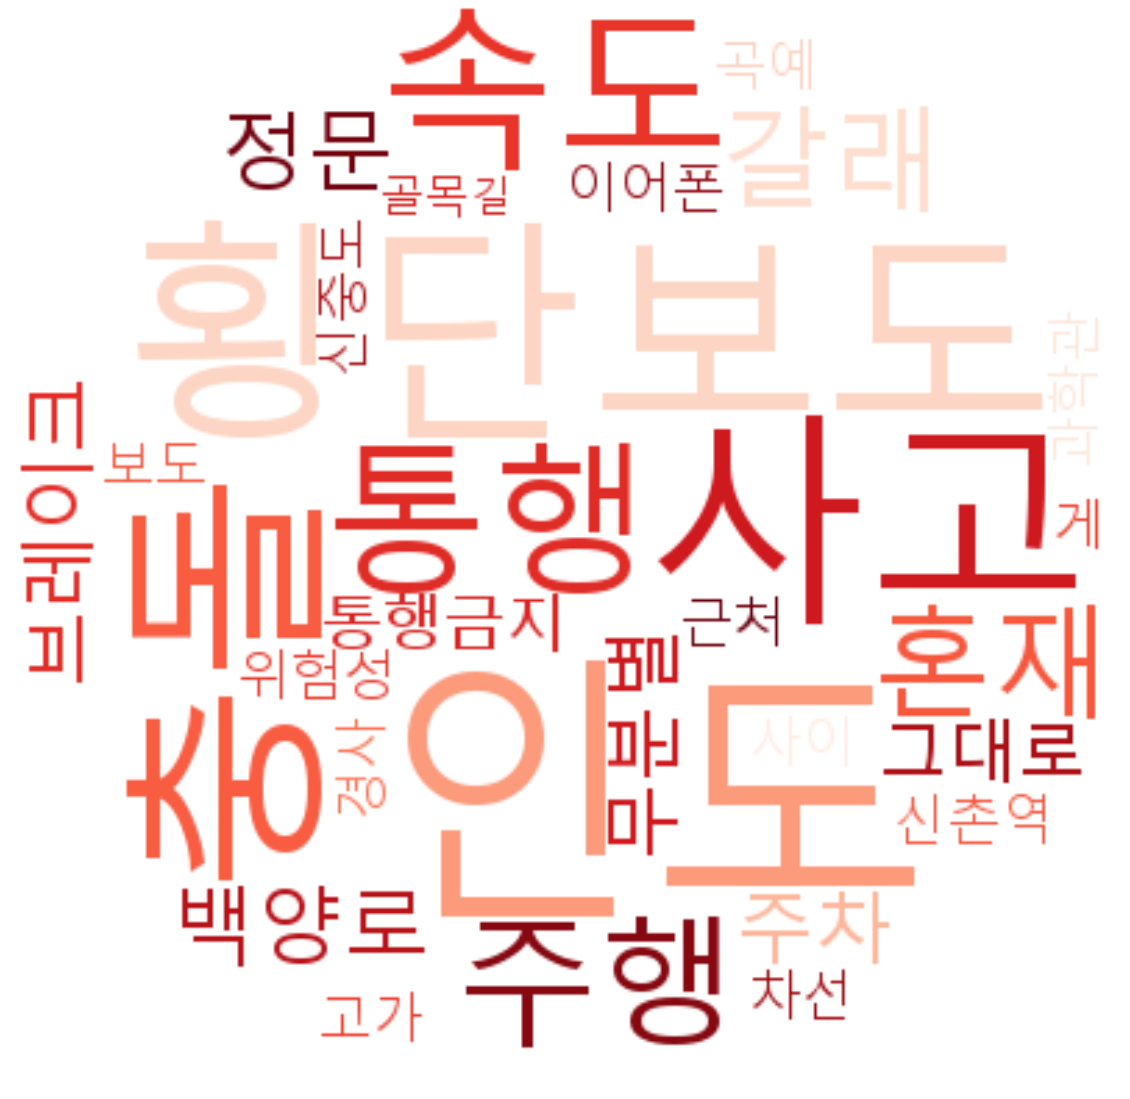

In [16]:
cand_mask=np.array(Image.open("./circle.png"))
wordcloud = WordCloud(
    font_path = 'malgun.ttf',
    background_color='white', 
    colormap='Reds',
    mask=cand_mask, 
).generate_from_frequencies(tag)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

In [17]:
df=pd.DataFrame(tags,columns=['word','count'])
df

,word,count
0,인도,15
1,횡단보도,10
2,사고,9
3,충돌,8
4,속도,7
5,통행,7
6,주행,7
7,혼재,7
8,갈래,6
9,백양로,5


In [18]:
df.to_csv('./df.csv',encoding='cp949')